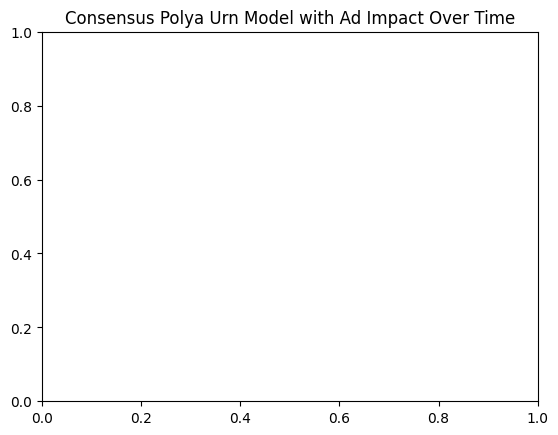

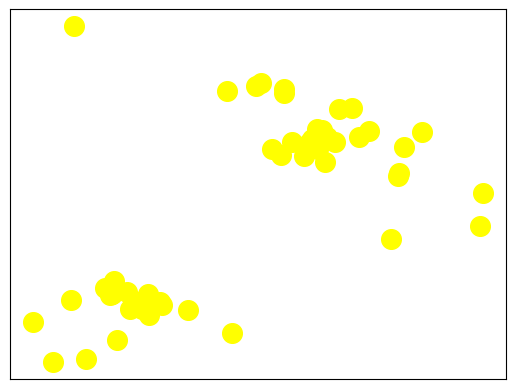

In [1]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import networkx as nx
import random

edges_414_path = "/Users/madeline/Downloads/archive (1)/facebook/facebook/414.edges"
edges_348_path = "/Users/madeline/Downloads/archive (1)/facebook/facebook/348.edges"
edges_686_path = "/Users/madeline/Downloads/archive (1)/facebook/facebook/686.edges"
#edges_698_path = "/Users/madeline/Downloads/archive (1)/facebook/facebook/698.edges"
# Initialize an empty graph
G = nx.Graph()

# Load and add edges from both files
for edge_file in [edges_414_path, edges_348_path, edges_686_path]:
    with open(edge_file, 'r') as ef:
        G = nx.compose(G, nx.read_edgelist(ef))
# Load your graph here, make sure to replace the path with the actual path to your .edges file
#G = nx.read_edgelist("/Users/madeline/Downloads/archive (1)/facebook/facebook/414.edges")

def consensus_polya_urn_model_animated(G, iterations, ad_effect_probability=0.1, ad_influence_strength=1):
    """
    This function captures the state of the network at each iteration for animation,
    including which node is currently influencing others. Only a third of the neighbors are influenced.
    """
    results = {node: {'count': 1, 'influenced': False, 'timestamps': []} for node in G.nodes()}
    data_per_iteration = []
    chosen_nodes_per_iteration = []  # Track the chosen node for each iteration
    
    for iteration in range(iterations):
        chosen_node = random.choice(list(G.nodes()))
        chosen_nodes_per_iteration.append(chosen_node)  # Record the chosen node
        
        results[chosen_node]['count'] += 1
        if random.random() < ad_effect_probability:
            results[chosen_node]['influenced'] = True
            neighbors = list(G.neighbors(chosen_node))
            random.shuffle(neighbors)  # Randomize the order of neighbors
            influenced_neighbors = neighbors[:max(1, len(neighbors))]  # Influence only a third of the neighbors, at least one
            
            for neighbor in influenced_neighbors:
                results[neighbor]['count'] += ad_influence_strength
                results[neighbor]['influenced'] = True
                results[neighbor]['timestamps'].append(iteration)
        
        sizes = [10 * results[node]['count'] / max(result['count'] for result in results.values()) for node in G.nodes()]
        colors = ['red' if results[node]['influenced'] else 'blue' for node in G.nodes()]
        data_per_iteration.append((sizes, colors))
    
    return data_per_iteration, chosen_nodes_per_iteration

iterations = 50  # Adjust the number of iterations as needed
data_per_iteration, chosen_nodes_per_iteration = consensus_polya_urn_model_animated(G, iterations)

fig, ax = plt.subplots()
pos = nx.spring_layout(G)  # Node positions for consistent layout

def update(num, data, G, chosen_nodes):
    ax.clear()
    sizes, colors = data[num]
    chosen_node = chosen_nodes[num]  # Get the chosen node for the current iteration
    nx.draw(G, pos, ax=ax, node_size=sizes, with_labels=False, node_color=colors, alpha=0.6, edge_color='gray')
    # Highlight the chosen node
    nx.draw_networkx_nodes(G, pos, nodelist=[chosen_node], node_size=200, node_color='yellow')

# Assign the animation to a variable to prevent it from being garbage collected
ani = FuncAnimation(fig, update, frames=iterations, fargs=(data_per_iteration, G, chosen_nodes_per_iteration))

plt.title("Consensus Polya Urn Model with Ad Impact Over Time")
plt.show()

# Save the animation to a file
ani.save('/Users/madeline/Desktop/network_animation2.mp4', writer='ffmpeg', fps=10)